In [ ]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from google.colab import files

##Center and Spread and the Normal Distribution

In [ ]:
#Let's create an array

In [ ]:
#mean or average


In [ ]:
#Standard Deviations


## Chebyshev's Bounds ##

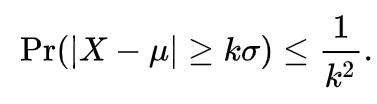

In [ ]:
#upload the file baby.csv


In [ ]:
# Extract the 'Maternal Pregnancy Weight' column

# Calculate the mean and standard deviation


In [ ]:
# Proportion within 3 SDs of the mean


In [ ]:
# Chebyshev's bound:
# This proportion should be at least


In [ ]:
births.columns

In [ ]:
# Iterate over each feature/column in the DataFrame
for feature in births.columns:
    values = births[feature]

    # Check if the column is numeric, since mean and std only apply to numeric data
    if np.issubdtype(values.dtype, np.number):
        mean = np.mean(values)
        sd = np.std(values)

        print(f"\n{feature}")

        # Check proportions for z = 2, 3, 4, 5 standard deviations
        for z in [2, 3, 4, 5]:
            # Filter the DataFrame where values fall within z standard deviations from the mean
            chosen = births[(values >= mean - z * sd) & (values <= mean + z * sd)]

            # Calculate the proportion of rows within the z standard deviations
            proportion = len(chosen) / len(births)
            percent = round(proportion * 100, 2)

            print(f'Average plus or minus {z} SDs: {percent}%')



## Standard Units ##

In [ ]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

## The SD and Bell Shaped Curves

In [ ]:
#upload the file baby.csv
uploaded = files.upload()

## Central Limit Theorem ##

In [ ]:
#upload the file baby.csv
uploaded = files.upload()

In [ ]:
def one_sample_mean(sample_size):
    """
    Takes a sample from the population of flights
    and computes its mean
    """
    # Sample 'sample_size' rows from the united DataFrame
    sampled_flights = united.sample(n=sample_size)

    # Compute and return the mean of the 'Delay' column from the sampled rows
    return sampled_flights['Delay'].mean()


In [ ]:
def ten_thousand_sample_means(sample_size):
    means = []  # Start with an empty list to store the sample means
    for i in range(10000):  # Loop 10,000 times
        mean = one_sample_mean(sample_size)  # Compute the mean for each sample
        means.append(mean)  # Append the mean to the list
    return np.array(means)  # Convert the list of means to a numpy array


In [ ]:
# Create a DataFrame with the sample means

# Plot a histogram of the sample means with 20 bins

# Display the plot


In [ ]:
# Generate sample means for sample size of 400

# Create a DataFrame with the sample means

# Plot a histogram of the sample means with 20 bins

# Display the plot

# Print the population average


## CLT: Spread

In [ ]:
# Create a DataFrame with columns for the sample means of size 400 and 900

# Display the DataFrame


In [ ]:


# Plot histograms for the '400' and '900' columns with the specified bins

# Set the title for the plot

# Display the plot


## Quantifying the Effect of Sample Size

In [ ]:

def plot_and_summarize_sample_means(sample_size):
    # Generate the sample means
    sample_means = ten_thousand_sample_means(sample_size)

    # Create a DataFrame for the sample means
    sample_means_df = pd.DataFrame({'Sample Means': sample_means})

    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_df['Sample Means'].plot(kind='hist', bins=20, figsize=(8, 5))

    # Add labels and title
    plots.xlabel('Sample Means')
    plots.title(f'Sample Size {sample_size}')

    # Display the plot
    plots.show()
